[413.09842693 531.11086696 218.17855418 383.1207039 ]


c:\Users\rfeng6\.conda\envs\cuda\lib\site-packages\numba\cuda\dispatcher.py:488: NumbaPerformanceWarning: Grid size 32 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


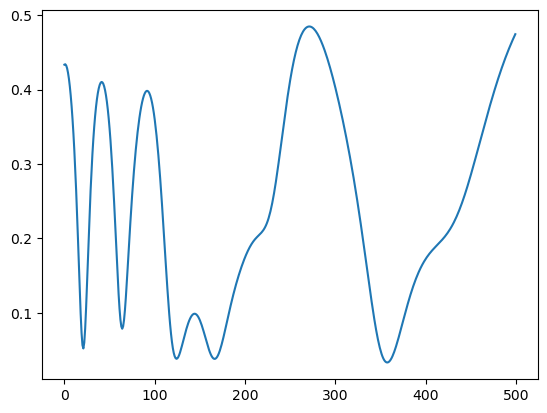

In [1]:
import sys
sys.path.append('./../../designer/script/')
from gets.get_spectrum import get_spectrum_simple
from film import FilmSimple
from spectrum import SpectrumSimple
from utils.plot_spectrum import plot_spectrum
import numpy as np
import copy
import matplotlib.pyplot as plt

WLS = np.linspace(500, 1000, 500)
INC_ANG = 60.
layer_number = 4
seed = 3

np.random.seed(seed)
d = np.random.random(layer_number) * 3000 / layer_number
print(d)
f = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
f.add_spec_param(INC_ANG, WLS)
f.calculate_spectrum()
spec = f.get_spec().get_R()

np.savetxt(f"generaetd_spectrum-INC_ANG{INC_ANG}-WLS{WLS[0]}to{WLS[-1]}-R_{layer_number}layers_seed{seed}.txt", spec)
plt.plot(spec)



In [4]:
print("n TiO2 at 750 nm", f.get_spec().n[250, 1])
print("n SiO2 at 750 nm", f.get_spec().n[250, 0])
print(f.get_optical_thickness(750))

n TiO2 at 750 nm (2.5334627507835505+0j)
n SiO2 at 750 nm (1.5393841396519676+0j)
(3288.09872243223+0j)


In [3]:
# reflection film
num = 500
wls = np.linspace(400, 1200, num) / 1000
R = np.ones(num, dtype=float)
np.savetxt('generated_spectrum_reflection_400-1200nm.txt', R)
np.savetxt('wls_400-1200nm.txt', wls)

(0.0, 1.1)

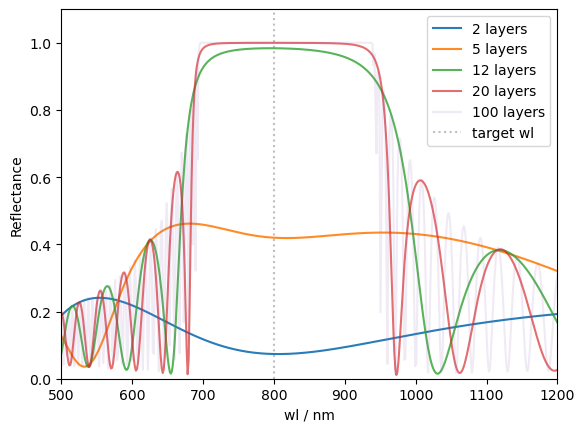

In [39]:
from gets.get_n import get_n_TiO2, get_n_SiO2

layer_numbers = [2, 5, 12, 20, 100]
f_demo = FilmSimple('SiO2', 'TiO2', 'SiO2', np.array([100]))
wl = 800 # nm

fig, ax = plt.subplots(1, 1)
wls = np.linspace(500, 1200, 500)
for layer_number in layer_numbers:
    d = np.array([wl / (4 * get_n_SiO2(wl)), wl / (4 * get_n_TiO2(wl))] * (layer_number // 2))    
    f = FilmSimple('SiO2', 'TiO2', 'SiO2', d)
    f.add_spec_param(0., wls)
    f.calculate_spectrum()
    alpha = np.exp(-layer_number / 50)
    ax.plot(wls, f.get_spec().get_R(), label=f'{layer_number} layers', alpha=alpha)
y_m = 1.1


ax.plot([wl, wl], [0, y_m], label='target wl', ls=':', alpha=0.5, c='grey')

ax.legend()
ax.set_xlabel('wl / nm')
ax.set_ylabel('Reflectance')
ax.set_xlim(wls[0], wls[-1])
ax.set_ylim(0, y_m)